### Week 13 Homework
##### Angela Spencer - December 22, 2021

#### 1.	Download the dataset here: https://www.kaggle.com/sohier/calcofi and create one DataFrame for the bottle file and another for the cast file. Perform preprocessing on this dataset. You do not need to do all six types of preprocessing we discussed. For this dataset, 2-3 is all you need. 

In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures

https://new.data.calcofi.org/index.php/database/calcofi-database/bottle-field-descriptions

https://new.data.calcofi.org/index.php/database/calcofi-database/cast-table-column-descriptions

In [2]:
#import bottle csv as a df
bottle_df = pd.read_csv('../Datasets/bottle.csv', low_memory=False)

#preserve an unaltered copy of the df
bottle_df_original = bottle_df.copy()

In [3]:
#check shape, column labels, and description of data
print(bottle_df.shape)
print(bottle_df.columns)
print(bottle_df.dtypes)
bottle_df.describe()

(864863, 74)
Index(['Cst_Cnt', 'Btl_Cnt', 'Sta_ID', 'Depth_ID', 'Depthm', 'T_degC',
       'Salnty', 'O2ml_L', 'STheta', 'O2Sat', 'Oxy_µmol/Kg', 'BtlNum',
       'RecInd', 'T_prec', 'T_qual', 'S_prec', 'S_qual', 'P_qual', 'O_qual',
       'SThtaq', 'O2Satq', 'ChlorA', 'Chlqua', 'Phaeop', 'Phaqua', 'PO4uM',
       'PO4q', 'SiO3uM', 'SiO3qu', 'NO2uM', 'NO2q', 'NO3uM', 'NO3q', 'NH3uM',
       'NH3q', 'C14As1', 'C14A1p', 'C14A1q', 'C14As2', 'C14A2p', 'C14A2q',
       'DarkAs', 'DarkAp', 'DarkAq', 'MeanAs', 'MeanAp', 'MeanAq', 'IncTim',
       'LightP', 'R_Depth', 'R_TEMP', 'R_POTEMP', 'R_SALINITY', 'R_SIGMA',
       'R_SVA', 'R_DYNHT', 'R_O2', 'R_O2Sat', 'R_SIO3', 'R_PO4', 'R_NO3',
       'R_NO2', 'R_NH4', 'R_CHLA', 'R_PHAEO', 'R_PRES', 'R_SAMP', 'DIC1',
       'DIC2', 'TA1', 'TA2', 'pH2', 'pH1', 'DIC Quality Comment'],
      dtype='object')
Cst_Cnt                  int64
Btl_Cnt                  int64
Sta_ID                  object
Depth_ID                object
Depthm                   i

,Cst_Cnt,Btl_Cnt,Depthm,T_degC,Salnty,O2ml_L,STheta,O2Sat,Oxy_µmol/Kg,BtlNum,...,R_CHLA,R_PHAEO,R_PRES,R_SAMP,DIC1,DIC2,TA1,TA2,pH2,pH1
count,864863.000000,864863.000000,864863.000000,853900.000000,817509.000000,696201.000000,812174.000000,661274.000000,661268.000000,118667.000000,...,225276.000000,225275.000000,864863.000000,122006.000000,1999.000000,224.000000,2084.000000,234.000000,10.000000,84.000000
mean,17138.790958,432432.000000,226.831951,10.799677,33.840350,3.392468,25.819394,57.103779,148.808694,10.497426,...,0.450225,0.198599,228.395694,162.071521,2153.239714,2168.148330,2256.055845,2278.858803,7.948570,7.910983
std,10240.949817,249664.587267,316.050259,4.243825,0.461843,2.073256,1.167787,37.094137,90.187533,6.189688,...,1.208566,0.376539,319.456731,85.722796,112.995202,154.852332,34.844435,58.496495,0.021216,0.077666
min,1.000000,1.000000,0.000000,1.440000,28.431000,-0.010000,20.934000,-0.100000,-0.434900,0.000000,...,-0.010000,-3.890000,0.000000,0.000000,1948.850000,1969.440000,2181.570000,2198.150000,7.923100,7.618300
25%,8269.000000,216216.500000,46.000000,7.680000,33.488000,1.360000,24.965000,21.100000,60.915470,5.000000,...,0.050000,0.050000,46.000000,200.000000,2028.330000,2008.977500,2230.322500,2229.062500,7.931475,7.898675
50%,16848.000000,432432.000000,125.000000,10.060000,33.863000,3.440000,25.996000,54.400000,151.064150,10.000000,...,0.160000,0.110000,126.000000,206.000000,2170.640000,2265.885000,2244.325000,2247.505000,7.946650,7.928850
75%,26557.000000,648647.500000,300.000000,13.880000,34.196900,5.500000,26.646000,97.600000,240.379600,16.000000,...,0.390000,0.230000,302.000000,214.000000,2253.810000,2315.525000,2278.505000,2316.452500,7.963300,7.955100
max,34404.000000,864863.000000,5351.000000,31.140000,37.034000,11.130000,250.784000,214.100000,485.701800,25.000000,...,66.110000,65.300000,5458.000000,424.000000,2367.800000,2364.420000,2434.900000,2437.000000,7.988300,8.047700


##### Preprocessing null values

In [4]:
#where are the NaNs in this dataset
bottle_df.isnull().sum()

Cst_Cnt                     0
Btl_Cnt                     0
Sta_ID                      0
Depth_ID                    0
Depthm                      0
                        ...  
TA1                    862779
TA2                    864629
pH2                    864853
pH1                    864779
DIC Quality Comment    864808
Length: 74, dtype: int64

In [5]:
#733418 X 24 - 800000 threshhold
#733418 X 24 - 700000
#454322 X 30 - 650000
#380282 X 32 - 600000
#299536 X 35 - 500000
#drop columns with many null values
bottle_df.dropna(axis=1, thresh=700000, inplace=True)
print(bottle_df.shape)
bottle_df.columns

(864863, 24)


Index(['Cst_Cnt', 'Btl_Cnt', 'Sta_ID', 'Depth_ID', 'Depthm', 'T_degC',
       'Salnty', 'STheta', 'RecInd', 'T_prec', 'S_prec', 'NH3q', 'C14A1q',
       'C14A2q', 'DarkAq', 'MeanAq', 'R_Depth', 'R_TEMP', 'R_POTEMP',
       'R_SALINITY', 'R_SIGMA', 'R_SVA', 'R_DYNHT', 'R_PRES'],
      dtype='object')

In [6]:
#drop rows with any null values
bottle_df.dropna(axis=0, inplace=True)
print(bottle_df.shape)

(733418, 24)


In [7]:
# no null values remain
print(bottle_df.isnull().sum().sum())

#reset index
bottle_df.reset_index(inplace=True)

0


In [8]:
#import cast csv as a df and check chape and column labels
cast_df = pd.read_csv('../Datasets/cast.csv', low_memory=False)

#preserve an unaltered copy of the df
cast_df_original = cast_df.copy()

#check shape and column labels
print(cast_df.shape)
cast_df.columns

(34404, 61)


Index(['Cst_Cnt', 'Cruise_ID', 'Cruise', 'Cruz_Sta', 'DbSta_ID', 'Cast_ID',
       'Sta_ID', 'Quarter', 'Sta_Code', 'Distance', 'Date', 'Year', 'Month',
       'Julian_Date', 'Julian_Day', 'Time', 'Lat_Dec', 'Lat_Deg', 'Lat_Min',
       'Lat_Hem', 'Lon_Dec', 'Lon_Deg', 'Lon_Min', 'Lon_Hem', 'Rpt_Line',
       'St_Line', 'Ac_Line', 'Rpt_Sta', 'St_Station', 'Ac_Sta', 'Bottom_D',
       'Secchi', 'ForelU', 'Ship_Name', 'Ship_Code', 'Data_Type', 'Order_Occ',
       'Event_Num', 'Cruz_Leg', 'Orig_Sta_ID', 'Data_Or', 'Cruz_Num', 'IntChl',
       'IntC14', 'Inc_Str', 'Inc_End', 'PST_LAN', 'Civil_T', 'TimeZone',
       'Wave_Dir', 'Wave_Ht', 'Wave_Prd', 'Wind_Dir', 'Wind_Spd', 'Barometer',
       'Dry_T', 'Wet_T', 'Wea', 'Cloud_Typ', 'Cloud_Amt', 'Visibility'],
      dtype='object')

In [9]:
cast_df.isnull().sum()

Cst_Cnt           0
Cruise_ID         0
Cruise            0
Cruz_Sta          0
DbSta_ID          0
              ...  
Wet_T         15415
Wea            7597
Cloud_Typ     24484
Cloud_Amt     22522
Visibility    24897
Length: 61, dtype: int64

In [10]:
#drop columns with many null values
cast_df.dropna(axis=1, thresh=30000, inplace=True)
cast_df.shape

(34404, 38)

In [11]:
#drop rows with any null values
cast_df.dropna(axis=0, inplace=True)
cast_df.shape

(28746, 38)

#### Preprocessing - feature engineering

In [12]:
#extract year from Depth_ID (first two digits-second two digits)
#extract station ID for location information(first three digits.one digit)
bottle_df.select_dtypes(include=['object']).head(5)

,Sta_ID,Depth_ID
0,054.0 056.0,19-4903CR-HY-060-0930-05400560-0000A-3
1,054.0 056.0,19-4903CR-HY-060-0930-05400560-0008A-3
2,054.0 056.0,19-4903CR-HY-060-0930-05400560-0010A-7
3,054.0 056.0,19-4903CR-HY-060-0930-05400560-0019A-3
4,054.0 056.0,19-4903CR-HY-060-0930-05400560-0020A-7


In [13]:
#https://docs.python.org/3/library/re.html
#example extraction to get it working
example = '054.0 056.0'
pattern = re.compile("\d+\.+\d")
station = re.match(pattern, example)
print(str(station.group(0)))

054.0


In [14]:
#create function to extract station ID from Sta_ID column
def extract_id(example):
    pattern = re.compile("\d+\.+\d")
    station = re.match(pattern, example)
    #if station is not None:
    return str(station.group(0))

#apply function to sta_id column, create a new column for extracted value
bottle_df['station_ext'] = bottle_df['Sta_ID'].apply(lambda row: extract_id(row))
bottle_df[['Sta_ID', 'station_ext']]

,Sta_ID,station_ext
0,054.0 056.0,054.0
1,054.0 056.0,054.0
2,054.0 056.0,054.0
3,054.0 056.0,054.0
4,054.0 056.0,054.0
...,...,...
733413,093.3 120.0,093.3
733414,093.3 120.0,093.3
733415,093.3 120.0,093.3
733416,093.4 026.4,093.4


In [15]:
#extract year from Depth_ID column
#example to get it working
example = '19-4903CR-HY-060-0930-05400560-0000A-3'
pattern = re.compile("\d+\-+\d{2}")
year = re.match(pattern, example)
year_str = str(year.group(0)).replace('-', '')
year_int = int(year_str)
year_int

1949

In [16]:
def extract_year(ex2):
    pattern = re.compile("\d+\-+\d{2}")
    year = re.match(pattern, ex2)
    year_str = str(year.group(0)).replace('-', '')
    return int(year_str)

#apply function to Depth_ID column, create new column for extracted year
bottle_df['year'] = bottle_df['Depth_ID'].apply(lambda row: extract_year(row))
#convert year to datetime
pd.to_datetime(bottle_df['year'], format='%Y').dt.year
bottle_df[['year', 'Depth_ID']].head()

,year,Depth_ID
0,1949,19-4903CR-HY-060-0930-05400560-0000A-3
1,1949,19-4903CR-HY-060-0930-05400560-0008A-3
2,1949,19-4903CR-HY-060-0930-05400560-0010A-7
3,1949,19-4903CR-HY-060-0930-05400560-0019A-3
4,1949,19-4903CR-HY-060-0930-05400560-0020A-7


#### Preprocessing, dropping redundant columns

In [17]:
bottle_df.columns

Index(['index', 'Cst_Cnt', 'Btl_Cnt', 'Sta_ID', 'Depth_ID', 'Depthm', 'T_degC',
       'Salnty', 'STheta', 'RecInd', 'T_prec', 'S_prec', 'NH3q', 'C14A1q',
       'C14A2q', 'DarkAq', 'MeanAq', 'R_Depth', 'R_TEMP', 'R_POTEMP',
       'R_SALINITY', 'R_SIGMA', 'R_SVA', 'R_DYNHT', 'R_PRES', 'station_ext',
       'year'],
      dtype='object')

In [18]:
columns_to_drop =['Depth_ID', 'Sta_ID', 'station_ext', 'Cst_Cnt', 'Btl_Cnt',
                 'RecInd', 'T_prec', 'S_prec', 'NH3q', 'C14A1q', 'C14A2q', 
                 'DarkAq', 'MeanAq', 'R_Depth', 'R_TEMP', 'R_POTEMP', 'R_SALINITY',
                  'R_SIGMA', 'index']

bottle_df.drop(columns_to_drop, axis=1, inplace=True)

In [19]:
bottle_df.columns

Index(['Depthm', 'T_degC', 'Salnty', 'STheta', 'R_SVA', 'R_DYNHT', 'R_PRES',
       'year'],
      dtype='object')

In [20]:
bottle_df.rename(columns = {'Depthm':'depth', 'T_degC':'temp', 'Salnty':'salinity', 
                 'STheta':'pot_density', 'R_SVA': 'spec_vol_anomaly', 
                 'R_DYNHT':'dynamic_height', 'R_PRES':'pressure'}, inplace=True)

#### Preprocessing, standardizing

In [21]:
#check variance of each column
bottle_df.var()

depth               95544.894736
temp                   18.001235
salinity                0.212519
pot_density             1.394544
spec_vol_anomaly     8671.128061
dynamic_height          0.151014
pressure            97568.311893
year                  330.518038
dtype: float64

In [22]:
#log normalize columns with high variance
columns_to_log_norm = ['depth', 'spec_vol_anomaly', 'pressure']
    
for column in columns_to_log_norm:
    bottle_df['log_'+column] = np.log(bottle_df[column]+1)
        

In [23]:
bottle_df[['depth', 'log_depth', 'spec_vol_anomaly', 'log_spec_vol_anomaly', 
           'pressure', 'log_pressure']]

,depth,log_depth,spec_vol_anomaly,log_spec_vol_anomaly,pressure,log_pressure
0,0,0.000000,233.0,5.455321,0,0.000000
1,8,2.197225,232.5,5.453182,8,2.197225
2,10,2.397895,232.8,5.454466,10,2.397895
3,19,2.995732,234.1,5.460011,19,2.995732
4,20,3.044522,234.0,5.459586,20,3.044522
...,...,...,...,...,...,...
733413,440,6.089045,125.3,4.838660,444,6.098074
733414,500,6.216606,117.5,4.774913,504,6.224558
733415,521,6.257668,113.9,4.744062,525,6.265301
733416,2,1.098612,402.5,6.000176,2,1.098612


In [24]:
#drop columns that were log normalized
bottle_df.drop(columns_to_log_norm, axis=1, inplace=True)

In [25]:
#view preprocessed dataframe
bottle_df

,temp,salinity,pot_density,dynamic_height,year,log_depth,log_spec_vol_anomaly,log_pressure
0,10.500,33.4400,25.64900,0.000,1949,0.000000,5.455321,0.000000
1,10.460,33.4400,25.65600,0.010,1949,2.197225,5.453182,2.197225
2,10.460,33.4370,25.65400,0.020,1949,2.397895,5.454466,2.397895
3,10.450,33.4200,25.64300,0.040,1949,2.995732,5.460011,2.995732
4,10.450,33.4210,25.64300,0.040,1949,3.044522,5.459586,3.044522
...,...,...,...,...,...,...,...,...
733413,6.312,34.1563,26.85639,1.026,2016,6.089045,4.838660,6.098074
733414,5.993,34.2160,26.94518,1.107,2016,6.216606,4.774913,6.224558
733415,5.818,34.2382,26.98477,1.123,2016,6.257668,4.744062,6.265301
733416,18.744,33.4083,23.87072,0.008,2016,1.098612,6.000176,1.098612


#### 2.	Create a correlation matrix to see how the features are correlated. Describe your findings. Pay particular attention to what is correlated with water temperature. 

Many of the variables that show correlation are possibly dependent on each other.  There is strong correlation between potential density, dynamic height, specific volume, and pressure because these are all measure that relate to volume, mass, and pressure.  Temperature seems to have a strong correlation with the previous four measures as well as a strong negative correlation to depth and a mild correlation with salinity.  Year was included in this matrix, but does not seem to have a correlation with any other inputs.

<function matplotlib.pyplot.show(close=None, block=None)>

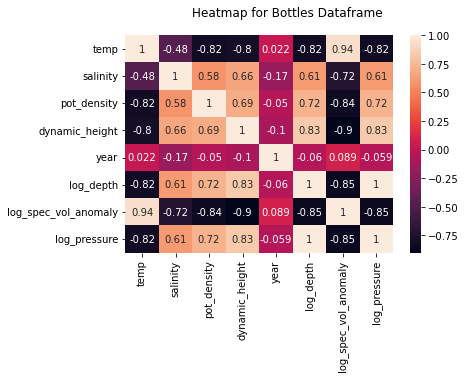

In [26]:
#view correlation matrix for preprocessed data
corr_matrix = bottle_df.corr()
corr_matrix

#plot the correlation heatmap
fig,ax = plt.subplots()
fig.suptitle('Heatmap for Bottles Dataframe')
sns.heatmap(corr_matrix, annot=True)
plt.show

#### 3.	Perform linear regression on the dataset to see if you can predict water temperature based on salinity. 

Based on the accuracy score of 0.227, this model does not accurately predict temperature based on saliity.

In [27]:
#isolate X and y variables
X = np.array(bottle_df['salinity']).reshape(-1,1)
y = np.array(bottle_df['temp']).reshape(-1,1)

#perform train-test-split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=14)

#create linear regression 
reg = LinearRegression()
reg.fit(X_train, y_train)

#predict values
y_pred = reg.predict(X_test)
y_pred

array([[11.6112668 ],
       [ 7.62452545],
       [10.81215253],
       ...,
       [10.28676801],
       [ 9.15652905],
       [10.13224315]])

In [28]:
#performance of linear regression model
accuracy_score = reg.score(X_test, y_test)
accuracy_score

0.22706296898508682

#### 4.	Find your mean squared error and R2 values. Be sure to indicate what these tell you. You can import these from sklearn.metrics . 
Both R-squared and Mean Squared Error (MSE) measure the accuracy of the linear regression model predictions compared to the test target variables

R-Squared is a ratio of SSR (Sum of Squares Regression) to SST (Sum of Squares Total) which is a measure of variance compared to the regression line. R-Squared is a value between 0 and 1, with 1 being a perfect fit.

MSE is the average of the sum of squared difference between actual and predicted values. The MSE is always positive and a score closer to zero represents low predictive error in the model.

In [29]:
#R-squared score
rsq_score = r2_score(y_test, y_pred)
print('R-Squared = '+ str(rsq_score))

#MSE score
mse_score = mean_squared_error(y_test, y_pred)
print('MSE = '+ str(mse_score))

R-Squared = 0.22706296898508682
MSE = 13.935584162214264


#### 5.	Create a final plot of the relationship between water temperature and salinity. Be sure to show the values from the dataset in a scatter plot with a trend line that shows the predicted temperature values. 

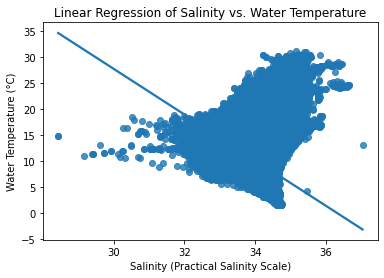

In [68]:
plt.figure()
sp = sns.regplot(data=bottle_df, x='salinity', y='temp')
sp.set_title("Linear Regression of Salinity vs. Water Temperature")
sp.set(xlabel='Salinity (Practical Salinity Scale)',
       ylabel='Water Temperature (°C)')
plt.show()

#### 6.	Do some research on polynomial regression. Describe what it is and how it works in markdown. This article is useful https://machinelearningmastery.com/polynomial-features-transforms-for-machine-learning/ 

Polynomial regression is a linear regression performed on feature engineered variables that have undergone polynomial transformation. The polynomial feature transformation involves creating new features that have undergone exponentiation to make the variability between features more pronounced. It is useful for some models and can produce higher accuracy measures in some cases by creating extra predictor variables for the model to extrapolate relationships between.

#### 7.	Perform polynomial regression on this same dataset. Train and validate your model as you did when you used linear regression. Mean squared error and R2 both apply here. 

In [64]:
#create polynomial feature object
poly = PolynomialFeatures(degree=2)

#use original train-test-split and transform X_train into X_pol_train
X_train_poly= poly.fit_transform(X_train)

#fit X training data with polynomial transformation to linear regression
linreg=LinearRegression()
linreg.fit(X_train_poly, y_train)

#predict y values from poly transformed and linear regressino fitted X_test data
y_poly_pred = linreg.predict(poly.fit_transform(X_test))
y_poly_pred

array([[11.27886425],
       [ 8.21251084],
       [10.42858411],
       ...,
       [ 9.93393587],
       [ 9.04292977],
       [ 9.79817056]])

In [66]:
#R-squared score
poly_rsq_score = r2_score(y_test, y_poly_pred)
print('R-Squared = '+ str(poly_rsq_score))

#MSE score
poly_mse_score = mean_squared_error(y_test, y_poly_pred)
print('MSE = '+ str(poly_mse_score))

R-Squared = 0.2446078939325217
MSE = 13.619259845466662


#### 8.	Create a final plot of the relationship between water temperature and salinity. Be sure to show the values from the dataset in a scatter plot with a trend line that shows the polynomial regression predicted temperature values. The resulting trend line should be curved. 

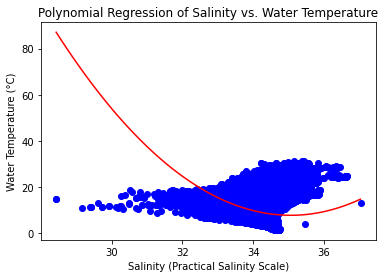

In [67]:
X_grid = np.arange(min(X), max(X), 0.1)
X_grid = X_grid.reshape(len(X_grid), 1)


plt.scatter(X,y,color='blue')
plt.plot(X_grid,linreg.predict(poly.fit_transform(X_grid)), color='red')

plt.title("Polynomial Regression of Salinity vs. Water Temperature")
plt.xlabel('Salinity (Practical Salinity Scale)')
plt.ylabel('Water Temperature (°C)')
              
plt.show()

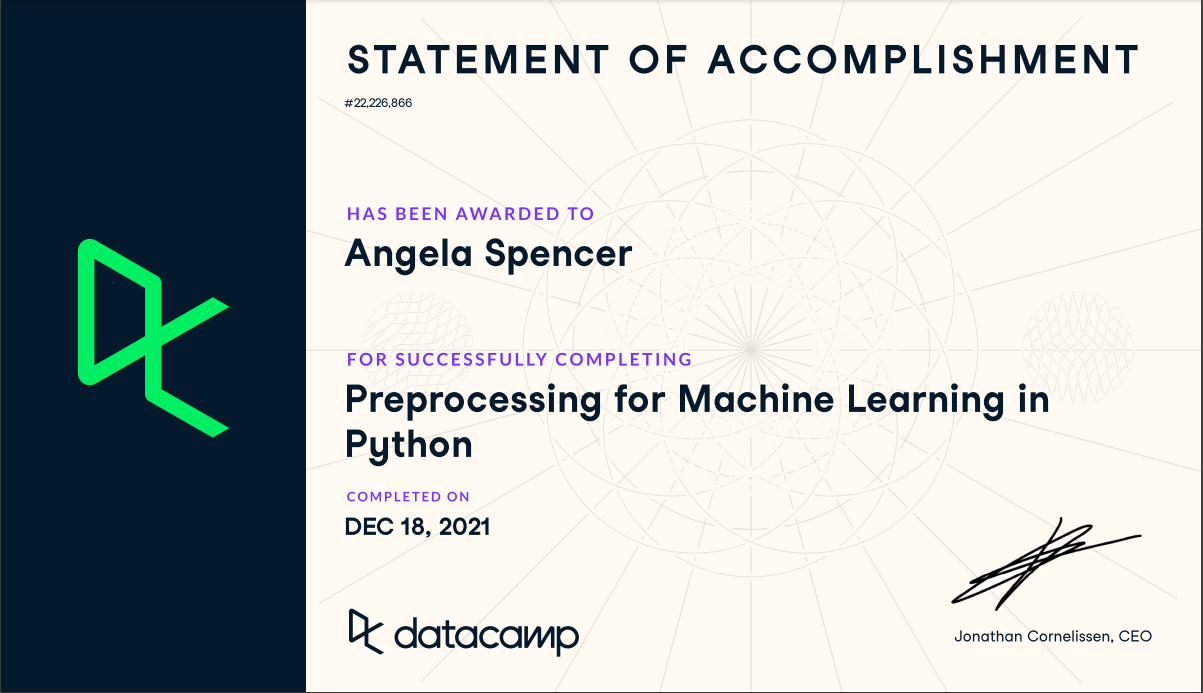